# Assignment 2


# Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

## Step 1: Load the dataset
Load the dataset into a dataframe that can be used for predicting  traffic_volume a day in advance. 

* date_time: DateTime Hour of the data collected in local CST time 
* rain_1h: Numeric Amount in mm of rain that occurred in the hour 
* snow_1h: Numeric Amount in mm of snow that occurred in the hour 
* temp: Numeric Average temp in kelvin 
* clouds_all: Numeric Percentage of cloud cover 
* traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [2]:
metro = pd.read_csv('metro_traffic_15_19.csv',index_col = None)
metro = pd.DataFrame(metro)
metro

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936
...,...,...,...,...,...,...
32042,2018-09-30 19:00:00,0.0,0.0,283.45,75,3543
32043,2018-09-30 20:00:00,0.0,0.0,282.76,90,2781
32044,2018-09-30 21:00:00,0.0,0.0,282.73,90,2159
32045,2018-09-30 22:00:00,0.0,0.0,282.09,90,1450


## Step 2: anaylse periodicity
In this section, I will produce some plots at different time-scales to see if there is periodicity in the traffic volume:

1.Graphs of traffic volume changes over a 24-hour day

2.Graphs of the change in traffic volume over a month

3.Graphs of traffic volume changes over 12 months of the year

4.A graph of the change in traffic from 2015 to 2018 to total


In [3]:
# Colors that we will use in various plots
colors = ["green","darkred","orange","navy",'purple','black','red']
# Default font size
fontsize = 13

### Data Parsing and Merging
To produce the different time scales the data must first be processed

First, I tried to find the cyclicality of traffic volumes over the years by creating a table of the changes in traffic volumes from 2015 to 2018: metro_year_day

In [4]:
type(metro)

pandas.core.frame.DataFrame

In [5]:
# Since only traffic volume changes need to be discussed in the first step, only traffic_volume is kept
metro_year_day = metro.loc[:,'traffic_volume']
metro_year_day = pd.DataFrame(metro_year_day)
time = metro["date_time"].str.split(expand=True)
metro_year_day["date_time"] = time[0]
metro_year_day["time"] = time[1]
metro_daytime = metro_year_day

In [6]:
# Grouping by date_time to calculate daily traffic
metro_year_day = metro_year_day.groupby(['date_time']).mean()
metro_ymd = metro_year_day.reset_index()
time = metro_ymd["date_time"].str.split(pat="-",expand=True)
metro_ymd["year_month"] = time[0]+'/'+time[1]
metro_ymd["year"] = time[0]
metro_ymd['month_day'] = time[1]+'/'+time[2]
metro_d = metro_ymd
metro_ymd

,date_time,traffic_volume,year_month,year,month_day
0,2015-07-01,3569.782609,2015/07,2015,07/01
1,2015-07-02,3584.791667,2015/07,2015,07/02
2,2015-07-03,2681.916667,2015/07,2015,07/03
3,2015-07-04,1767.102564,2015/07,2015,07/04
4,2015-07-05,2254.269231,2015/07,2015,07/05
...,...,...,...,...,...
1180,2018-09-26,3692.791667,2018/09,2018,09/26
1181,2018-09-27,3777.360000,2018/09,2018,09/27
1182,2018-09-28,3854.916667,2018/09,2018,09/28
1183,2018-09-29,3049.680000,2018/09,2018,09/29


In [7]:
# Grouping by YEAR to calculate monthly traffic volumes
metro_ymd = metro_ymd.groupby(['year_month']).mean()
metro_ymd.head()

,traffic_volume
year_month,
2015/07,3197.446516
2015/08,3302.822426
2015/09,3303.734952
2015/10,3292.337596
2015/11,3105.254799


Plotting the change in traffic volumes from 2015 to 2018 on a monthly basis

In [8]:
def draw_plot(y):
    plt.figure(figsize=(14,5),dpi=150)#figsize specifies the size of the image, dpi sets the sharpness of the image
    plt.plot(y)
    plt.xticks(list(range(0, 40,2)),fontsize = 8) 
    plt.title("Traffic volume" ,fontsize = 10)  #set title
    plt.xlabel("Time (year/month)",fontsize = 8)    # Set x-coordinate labeling with font size 8
    plt.ylabel("traffic_volume",fontsize = 8)    #Set y coordinate label
    plt.show()

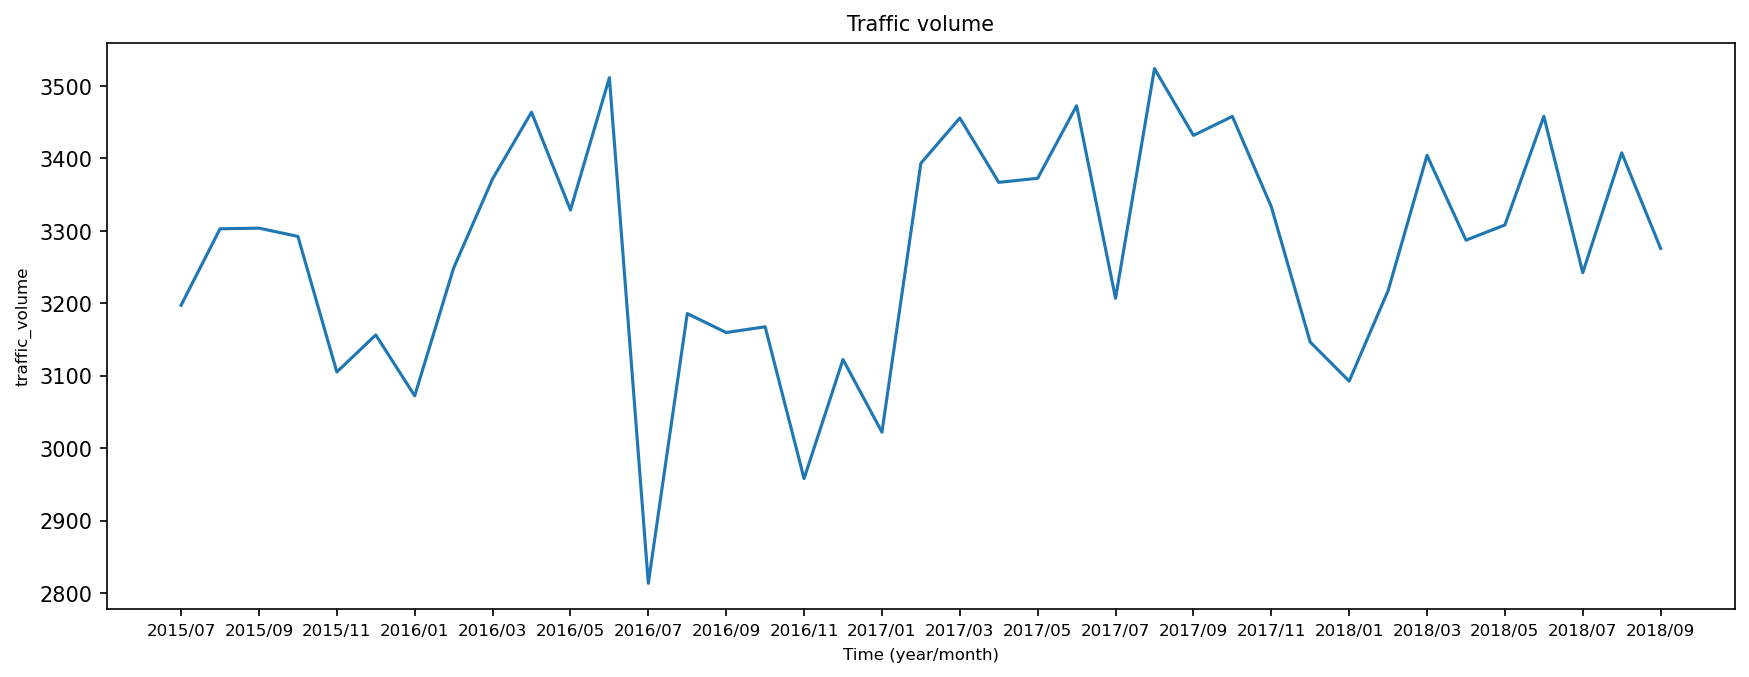

In [9]:
draw_plot(metro_ymd)

Result: No annual periodicity found


Thus, I next divided the traffic volumes into four graphs according to different years. And, in order to facilitate the comparison of the data in the different graphs with each other at the same point in time, I pre-processed some of the missing data for 2015 and 2018 in advance.

In [10]:
#The data was divided into four groups according to different YEARS to calculate the traffic volume separately
metro_y = metro_d.groupby(metro_d.year)
metro_y15 = metro_y.get_group('2015').drop(['year_month','year','date_time'],axis = 1).rename(columns={'traffic_volume':'traffic_vol_2015'})
metro_y16 = metro_y.get_group('2016').drop(['year_month','year','date_time'],axis = 1).rename(columns={'traffic_volume':'traffic_vol_2016'})
metro_y17 = metro_y.get_group('2017').drop(['year_month','year','date_time'],axis = 1).rename(columns={'traffic_volume':'traffic_vol_2017'})
metro_y18 = metro_y.get_group('2018').drop(['year_month','year','date_time'],axis = 1).rename(columns={'traffic_volume':'traffic_vol_2018'})

In [11]:
# Combined four tables
# Some data is missing for 2015 and 2018, but the missing values are taken as null in order not to affect the overall structure
left = metro_y15
for i in [metro_y16,metro_y17,metro_y18]:
    right = i
    left = pd.merge(left, right, how='outer', on=['month_day'])
traffic_year = left.set_index('month_day')
# Sort the traffic_year table in chronological order
traffic_year = traffic_year.sort_index(axis=0)
traffic_year

,traffic_vol_2015,traffic_vol_2016,traffic_vol_2017,traffic_vol_2018
month_day,,,,
01/01,NaN,1815.210526,2127.625000,1749.333333
01/02,NaN,2278.777778,2376.380952,3365.892857
01/03,NaN,2202.153846,2675.129032,3286.200000
01/04,NaN,3899.571429,3405.240000,3535.250000
01/05,NaN,3595.294118,2900.838710,3618.958333
...,...,...,...,...
12/27,2256.894737,3150.750000,3262.666667,NaN
12/28,2666.952381,3375.916667,3030.086957,NaN
12/29,2360.172414,3431.916667,3351.586207,NaN


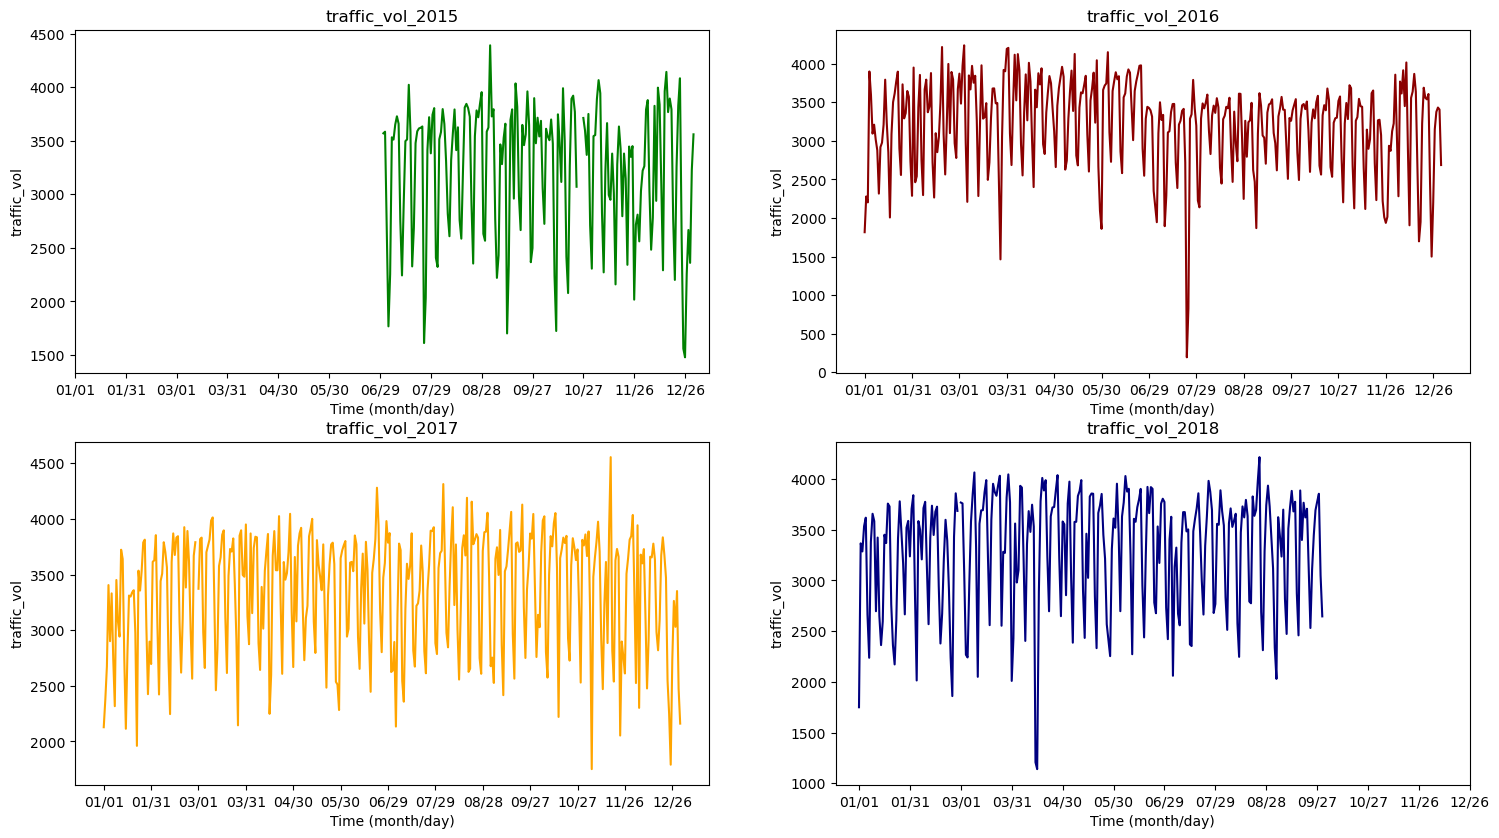

In [12]:
#Plotting comparisons of the same sun and moon in different years
figure = plt.figure(figsize=(18,10),dpi = 100)
i = 0
for index_name in list(traffic_year):
    axc = figure.add_subplot(2,2, i+1)
    axc.plot(traffic_year[index_name],color = colors[i])
    axc.set_xticks(list(range(0,366,30))) 
    axc.set_title(index_name) 
    axc.set_xlabel("Time (month/day)") 
    axc.set_ylabel("traffic_vol") 
    i = i+1

The graph above shows the change in traffic volumes on a daily basis throughout the year for four different years, the graph is not complete for 2015 and 2018 due to missing data for some time periods. Based on the graph above, looking at the overall picture, I find that there is not a clear trend in traffic volumes throughout the year, so there is not a large variation in traffic volumes from month to month. However, it is clear to see that there is a cyclical nature to the change in traffic volumes. So, next I am going to analyse the change in traffic volumes for just one month, which should make it more obvious that there is a cycle.

### Monthly Traffic Volume Change Chart
As I am just trying to find the cyclicality of traffic volume changes more obviously, I have chosen one month of 2017 for the analysis.

In [13]:
time = metro_y17['month_day'].str.split(pat="/",expand=True)
metro_y17['month'] = time[0]
metro_y17['day'] = time[1]
metro_month = metro_y17.groupby(['day']).mean()
metro_month.head()

,traffic_vol_2017
day,
01,3342.951820
02,3229.634185
03,3360.895599
04,3209.930379
05,3087.957574


Randomly choose four different months for analysis, in this case I have chosen January, April, July, October

In [14]:
metro_January = metro_y17.groupby(['month']).get_group('01').drop(['month','month_day'],axis = 1).set_index('day')
metro_April = metro_y17.groupby(['month']).get_group('04').drop(['month','month_day'],axis = 1).set_index('day')
metro_July = metro_y17.groupby(['month']).get_group('07').drop(['month','month_day'],axis = 1).set_index('day')
metro_October = metro_y17.groupby(['month']).get_group('10').drop(['month','month_day'],axis = 1).set_index('day')

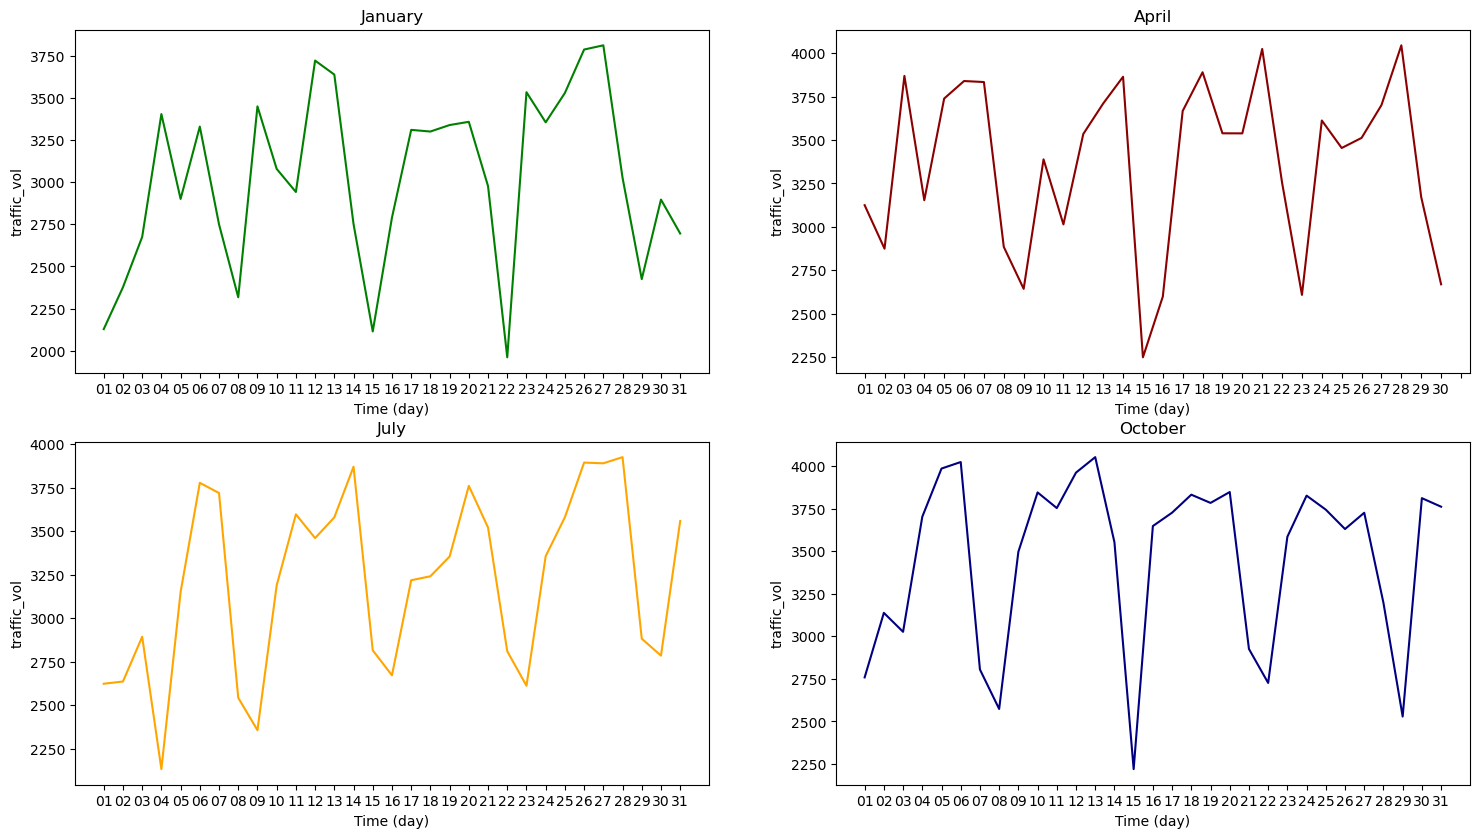

In [15]:
figure = plt.figure(figsize=(18,10),dpi = 100)
i = 0
name = ['January','April','July','October']
for index_name in [metro_January,metro_April,metro_July,metro_October]:
    axc = figure.add_subplot(2,2, i+1)
    axc.plot(index_name,color = colors[i])
    axc.set_xticks(list(range(0,31))) 
    axc.set_title(name[i]) 
    axc.set_xlabel("Time (day)") 
    axc.set_ylabel("traffic_vol") 
    i = i+1

From the graph it is clear that there are four peaks of traffic in a month, which change in a 7-day cycle

The next step is to analyse whether there is a cycle in the volume of traffic within a day

### Traffic volume change over the day
Four days were randomly selected for the analysis. If the average is used for the analysis, this may result in a less pronounced cyclical character. Or if only one data is used, it may appear that there is insufficient evidence of cyclicality.

In [16]:
metro_daytime['time'] = metro_daytime['time'].str.split(pat=":",expand=True)[0]

In [17]:
day1 = metro_daytime.groupby(['date_time']).get_group('2015-07-01').drop(['date_time'],axis = 1).set_index('time')
day2 = metro_daytime.groupby(['date_time']).get_group('2016-05-10').drop(['date_time'],axis = 1).set_index('time')
day3 = metro_daytime.groupby(['date_time']).get_group('2017-10-24').drop(['date_time'],axis = 1).set_index('time')
day4 = metro_daytime.groupby(['date_time']).get_group('2018-02-05').drop(['date_time'],axis = 1).set_index('time')

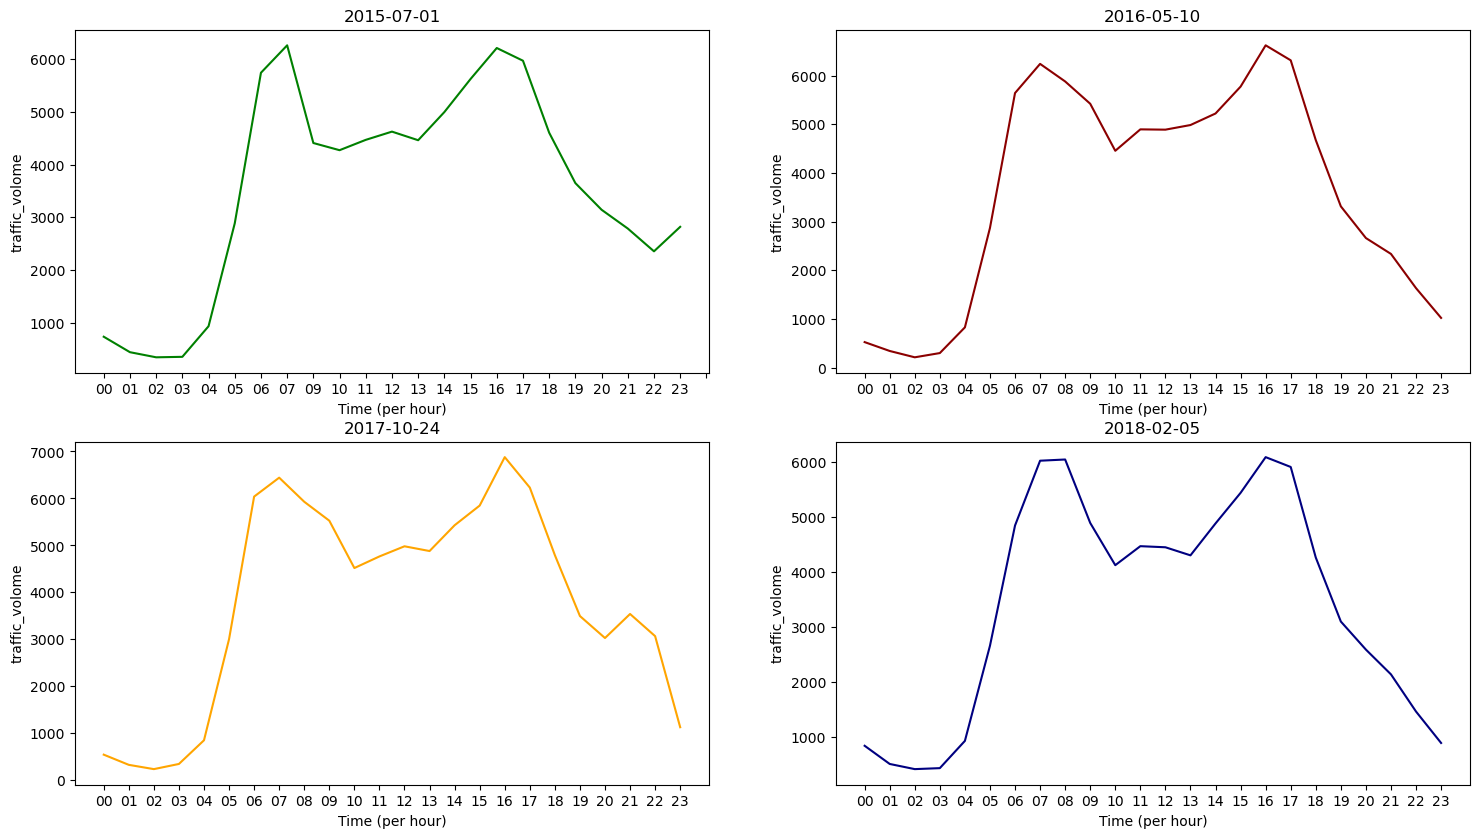

In [18]:
figure = plt.figure(figsize=(18,10),dpi = 100)
i = 0
name = ['2015-07-01','2016-05-10','2017-10-24','2018-02-05']
for index_name in [day1,day2,day3,day4]:
    axc = figure.add_subplot(2,2, i+1)
    axc.plot(index_name,color = colors[i])
    axc.set_xticks(list(range(0,24))) 
    axc.set_title(name[i]) 
    axc.set_xlabel("Time (per hour)") 
    axc.set_ylabel("traffic_volome") 
    i = i+1

I randomly selected four days of hourly traffic volumes for analysis. According to the above graph, I found that 7am and 16pm are the high traffic volume a peak

# Task 2
predicting traffic volume from data available a day in advance
## Step 1 - Extract date features
1.Extract hour, day and month features from the time-stamps. 

In [19]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [20]:
# get current date
datetime_object = datetime.now()
print(datetime_object)
print(datetime_object.hour)
print('Type :- ',type(datetime_object))

2022-12-02 00:01:25.398033
0
Type :-  <class 'datetime.datetime'>


In [21]:
type(metro['date_time'][1])
print(metro['date_time'][1])

2015-07-01 01:00:00


In [22]:
#Converting time data objects to datetime format
year = []
month = []
day = []
hour = []
for date_str in metro['date_time']:
    my_date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    year.append(my_date.year)
    month.append(my_date.month)
    day.append(my_date.day)
    hour.append(my_date.hour)

## Step 2 - Dividing the data set
2.Divide the data into train and test sets keeping one third of the data for testing. 
date is feature:x, traffic_vol is target:y

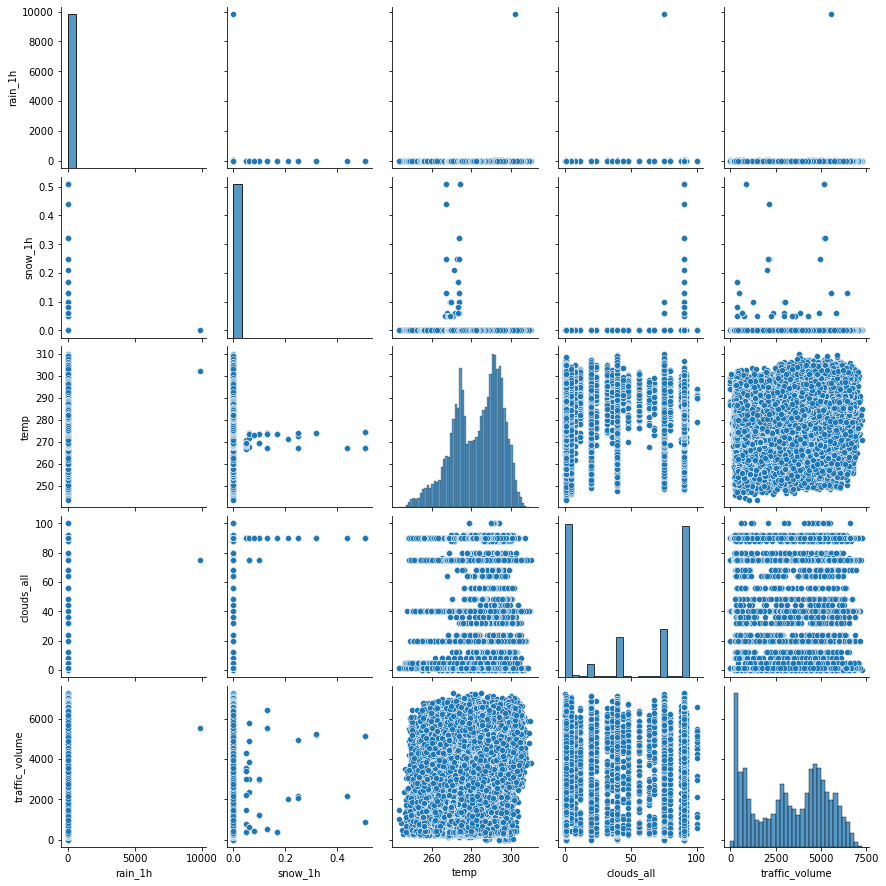

In [23]:
sns.pairplot(metro)

In [24]:
#1）Get data: get feature and target separately
x = pd.DataFrame({
#     "year": year,
    "month": month,
    "day": day,
    "hour": hour,
    "rain_1h":metro["rain_1h"],
    "snow_1h":metro["snow_1h"],
    "temp":metro["temp"],
    "clouds_all":metro["clouds_all"],
    })
y = metro['traffic_volume']
print("number of feature：\n",x.shape)

number of feature：
 (32047, 7)


Divide the data set: Set the parameter test_size = 0.33 on behalf of there are one third of the data for testing

In [25]:
# parameters: feature value, target value, want to compare the effect of the two models optimization, let divide the data set random to keep the same
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 22,test_size = 0.33) 
print("x_train:",x_train.shape," x_test:",x_test.shape)

x_train: (21471, 7)  x_test: (10576, 7)


By printing the sizes of the training and test sets separately, we can see that train:test = 2:1

## Step 3 - Build two different regression models and test the accuracy

## Linear Regression

In [26]:
index = {}
index['date'] = x_test['month']+x_test['day']+x_test['hour']

### Optimization methods for gradient descent
result: Mean absolute error is 1683.55

In [27]:
#Optimization methods for gradient descent

# Standardisation
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# estimator
estimator = SGDRegressor(max_iter= 100)# max_iter iterations, can also be set eta0, learning_constant
estimator.fit(x_train,y_train)

# Gradient descent model
print("Gradient descent - weights are：\n",estimator.coef_)
print("Gradient descent - Bias is：\n",estimator.intercept_)
# pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

# Model evaluation
y_predict = estimator.predict(x_test)
print("Forecast traffic volumes：\n",y_predict)
error = mean_squared_error(y_test,y_predict)# Mean squared error
print("Gradient descent - The mean square error is：\n",error)

print(' R squared statistic: {:.3f}'.format(estimator.score(x_test, y_test)))
print(' All - MAE: {:.2f}'.format(mean_absolute_error(y_test,y_predict)))# Mean absolute error
print(' RMSE:', np.sqrt(mean_squared_error(y_test, y_predict)))#Root Mean Square Error (RMSE)
print(' All - MAPE: {:.2f}'.format(MAPE(y_test,y_predict)))
print(' Slope: {:.2f}'.format(estimator.coef_[0]))
print(' Intercept:', estimator.intercept_)

Gradient descent - weights are：
 [-30.90349017 -43.40599596 655.07699804 -58.93865926 -23.77268509
 197.21939312 180.59228566]
Gradient descent - Bias is：
 [3282.74339435]
Forecast traffic volumes：
 [2540.41031636 3061.73687582 2490.23817107 ... 2741.61058775 3733.26116833
 4165.63583619]
Gradient descent - The mean square error is：
 43516245.00500314
 R squared statistic: -10.171
 All - MAE: 1684.70
 RMSE: 6596.68439483072
 All - MAPE: 3.46
 Slope: -30.90
 Intercept: [3282.74339435]


A large coefficient on a particular variable means that that variable has a large effect on the value of the variable you are trying to predict. Again, small values have little effect

In [28]:
pd.DataFrame(estimator.coef_, x.columns, columns = ['Coeff'])

,Coeff
month,-30.903490
day,-43.405996
hour,655.076998
rain_1h,-58.938659
snow_1h,-23.772685
temp,197.219393
clouds_all,180.592286


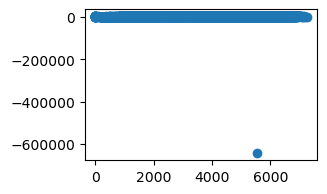

In [29]:
figure = plt.figure(figsize=(3,2),dpi = 100)
plt.scatter(y_test,y_predict)

The graph of the prediction-target relationship shows that the current predictions are not very good, which may be due to some of the eigenvalues

(array([1.0575e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -4594.36852739,  61020.11722635, 126634.60298008, 192249.08873382,
        257863.57448755, 323478.06024129, 389092.54599502, 454707.03174876,
        520321.51750249, 585936.00325623, 651550.48900996]),
 <BarContainer object of 10 artists>)

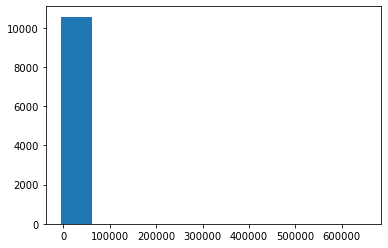

In [30]:
plt.hist(y_test - y_predict)

### Optimization methods for ridge regression
result: Mean absolute error is 1706.02

From the previous gradient descent results, it can be seen that prediction using a gradient descent model is slightly better than prediction using a ridge regression model

In [31]:
# Optimization methods for ridge regression

# Standardisation
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# estimator
estimator = Ridge(max_iter= 100,alpha = 0.5)
estimator.fit(x_train,y_train)

# Ridge regression model
print("ridge regression - weights are：\n",estimator.coef_)
print("ridge regression - Bias is：\n",estimator.intercept_)
# pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

# Model evaluation
y_predict = estimator.predict(x_test)
print("Forecast traffic volumes：\n",y_predict)
error = mean_squared_error(y_test,y_predict)# Mean squared error
print("ridge regression - The mean square error is：\n",error)

print(' R squared statistic: {:.3f}'.format(estimator.score(x_test, y_test)))
print(' All - MAE: {:.2f}'.format(mean_absolute_error(y_test,y_predict)))# Mean absolute error
print(' RMSE:', np.sqrt(mean_squared_error(y_test, y_predict)))#Root Mean Square Error (RMSE)
print(' All - MAPE: {:.2f}'.format(MAPE(y_test,y_predict)))
print(' Slope: {:.2f}'.format(estimator.coef_[0]))
print(' Intercept:', estimator.intercept_)

ridge regression - weights are：
 [-54.20243272 -19.84717309 666.48700066 -80.64432799   4.80719572
 197.79958621 183.7011046 ]
ridge regression - Bias is：
 3251.0672535047274
Forecast traffic volumes：
 [2444.75496248 3052.95825749 2391.24100274 ... 2665.42608906 3676.708944
 4198.49793295]
ridge regression - The mean square error is：
 78452687.16650274
 R squared statistic: -19.140
 All - MAE: 1706.02
 RMSE: 8857.352153239857
 All - MAPE: 3.42
 Slope: -54.20
 Intercept: 3251.0672535047274


# Task 3 cyclical feature
1.Given that the linear numeric encoding of the hour, day and month features may miss cyclical signals, investigate and test a cyclical strategy for encoding these features. Does this strategy improve accuracy for the models tested in Task 2?

We can now illustrate the problem of time as a cyclical feature. We will do so using the hour of the day as an example. Let's extract the hours from the datetime:

In [32]:
x

,month,day,hour,rain_1h,snow_1h,temp,clouds_all
0,7,1,0,0.0,0.0,289.20,1
1,7,1,1,0.0,0.0,289.40,1
2,7,1,2,0.0,0.0,289.19,1
3,7,1,3,0.3,0.0,288.74,1
4,7,1,4,0.0,0.0,288.07,1
...,...,...,...,...,...,...,...
32042,9,30,19,0.0,0.0,283.45,75
32043,9,30,20,0.0,0.0,282.76,90
32044,9,30,21,0.0,0.0,282.73,90
32045,9,30,22,0.0,0.0,282.09,90


In [33]:
#In the analysis of task1 I found that the traffic volume varies mainly according to a 7-day cycle
sample = x[:168]# roughly the first week of the data 24*7

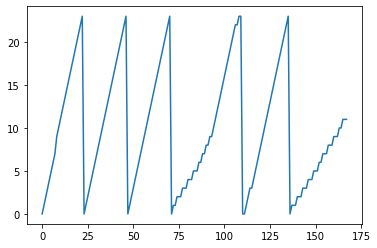

In [34]:
ax = sample['hour'].plot()

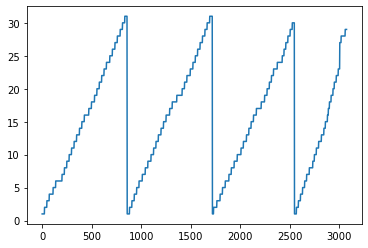

In [35]:
sample2 = x[:3072]
ax = sample2['day'].plot()

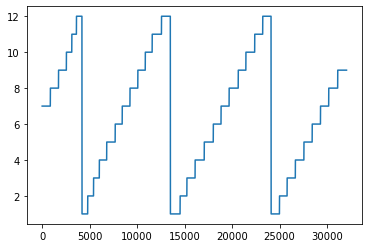

In [36]:
ax = x['month'].plot()

Here we see exactly what we would expect from hourly data for a week: a cycle between 0 and 23 that repeats 5 times

In [37]:
sample[20:26]

,month,day,hour,rain_1h,snow_1h,temp,clouds_all
20,7,1,21,0.0,0.0,291.19,1
21,7,1,22,0.0,0.0,289.67,1
22,7,1,23,0.0,0.0,288.10,1
23,7,2,0,0.0,0.0,287.36,1
24,7,2,1,0.0,0.0,286.47,1
25,7,2,2,0.0,0.0,286.22,1


The difference in time between records 10 and 11 is of course  1  hour. If we leave the hour feature unencoded, everything works in this case:  23−22=1

However, if we look at rows 22 and 23 we see the failure in our encoding:  0 − 23 = −23, even though the records are again only one hour apart.

We need to change the encoding of the feature such that midnight and 11:00PM are the same distance apart as any other two hours.

### Encoding Cyclical Features
A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [38]:
x['hour_sin'] = np.sin(2 * np.pi * x['hour']/24.0)
x['hour_cos'] = np.cos(2 * np.pi * x['hour']/24.0)

In [39]:
sample = x[0:168]

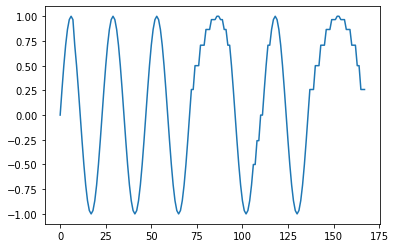

In [40]:
ax = sample['hour_sin'].plot()

In [41]:
x['day_sin'] = np.sin(2 * np.pi * x['day']/31.0)
x['day_cos'] = np.cos(2 * np.pi * x['day']/31.0)

In [42]:
sample2 = x[0:3072]
sample2.head(860)

,month,day,hour,rain_1h,snow_1h,temp,clouds_all,hour_sin,hour_cos,day_sin,day_cos
0,7,1,0,0.0,0.0,289.20,1,0.000000,1.000000,2.012985e-01,0.97953
1,7,1,1,0.0,0.0,289.40,1,0.258819,0.965926,2.012985e-01,0.97953
2,7,1,2,0.0,0.0,289.19,1,0.500000,0.866025,2.012985e-01,0.97953
3,7,1,3,0.3,0.0,288.74,1,0.707107,0.707107,2.012985e-01,0.97953
4,7,1,4,0.0,0.0,288.07,1,0.866025,0.500000,2.012985e-01,0.97953
...,...,...,...,...,...,...,...,...,...,...,...
855,7,31,22,0.0,0.0,293.38,1,-0.500000,0.866025,-2.449294e-16,1.00000
856,7,31,23,0.0,0.0,293.05,1,-0.258819,0.965926,-2.449294e-16,1.00000
857,8,1,0,0.0,0.0,292.19,40,0.000000,1.000000,2.012985e-01,0.97953
858,8,1,1,0.0,0.0,291.57,40,0.258819,0.965926,2.012985e-01,0.97953


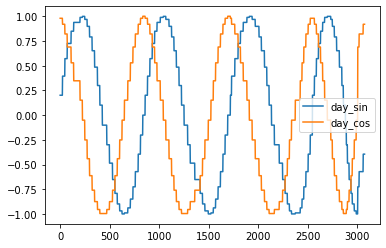

In [43]:
ax = sample2[['day_sin','day_cos']].plot()

As expected, it is cyclical, based on the sine graph. Looking at the values around midnight again:

In [44]:
sample[20:26]

,month,day,hour,rain_1h,snow_1h,temp,clouds_all,hour_sin,hour_cos
20,7,1,21,0.0,0.0,291.19,1,-0.707107,0.707107
21,7,1,22,0.0,0.0,289.67,1,-0.500000,0.866025
22,7,1,23,0.0,0.0,288.10,1,-0.258819,0.965926
23,7,2,0,0.0,0.0,287.36,1,0.000000,1.000000
24,7,2,1,0.0,0.0,286.47,1,0.258819,0.965926
25,7,2,2,0.0,0.0,286.22,1,0.500000,0.866025


Now, the absolute difference between hour_sin before midnight, at midnight and after midnight is the same. However, if we look at the graph of hour_sin, we can see that there is a problem. If we consider only one dimension, there are two records with exactly the same value of hour_sin.

This is why the cosine transformation is also needed in order to separate these records from each other.

Plotting these two features together in both dimensions, we get the following result.

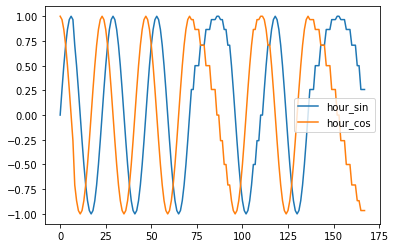

In [45]:
ax = sample[['hour_sin','hour_cos']].plot()

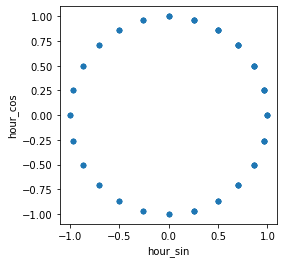

In [46]:
ax = sample.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

In [47]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [48]:
data = encode(x, 'month', 12)

# data = encode(data, 'day', 31)

In [49]:
# cyc_x = x.drop(['month','day','hour'],axis=1)
cyc_x = x
cyc_x

,month,day,hour,rain_1h,snow_1h,temp,clouds_all,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,7,1,0,0.0,0.0,289.20,1,0.000000,1.000000,0.201299,0.97953,-0.5,-8.660254e-01
1,7,1,1,0.0,0.0,289.40,1,0.258819,0.965926,0.201299,0.97953,-0.5,-8.660254e-01
2,7,1,2,0.0,0.0,289.19,1,0.500000,0.866025,0.201299,0.97953,-0.5,-8.660254e-01
3,7,1,3,0.3,0.0,288.74,1,0.707107,0.707107,0.201299,0.97953,-0.5,-8.660254e-01
4,7,1,4,0.0,0.0,288.07,1,0.866025,0.500000,0.201299,0.97953,-0.5,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32042,9,30,19,0.0,0.0,283.45,75,-0.965926,0.258819,-0.201299,0.97953,-1.0,-1.836970e-16
32043,9,30,20,0.0,0.0,282.76,90,-0.866025,0.500000,-0.201299,0.97953,-1.0,-1.836970e-16
32044,9,30,21,0.0,0.0,282.73,90,-0.707107,0.707107,-0.201299,0.97953,-1.0,-1.836970e-16
32045,9,30,22,0.0,0.0,282.09,90,-0.500000,0.866025,-0.201299,0.97953,-1.0,-1.836970e-16


Because new feature values are generated, the dataset needs to be re-divided once

In [50]:
x_train, x_test, y_train, y_test = train_test_split(cyc_x,y,random_state = 22,test_size = 0.33) 

In [51]:
#Optimization methods for gradient descent

# Standardisation
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# estimator
estimator = SGDRegressor(max_iter= 100)# max_iter iterations, can also be set eta0, learning_constant
estimator.fit(x_train,y_train)

# Gradient descent model
print("Gradient descent - weights are：\n",estimator.coef_)
print("Gradient descent - Bias is：\n",estimator.intercept_)
# pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

# Model evaluation
y_predict = estimator.predict(x_test)
print("Forecast traffic volumes：\n",y_predict)
error = mean_squared_error(y_test,y_predict)# Mean squared error
print("Gradient descent - The mean square error is：\n",error)

print(' R squared statistic: {:.3f}'.format(estimator.score(x_test, y_test)))
print(' All - MAE: {:.2f}'.format(mean_absolute_error(y_test,y_predict)))# Mean absolute error
print(' RMSE:', np.sqrt(mean_squared_error(y_test, y_predict)))#Root Mean Square Error (RMSE)
print(' All - MAPE: {:.2f}'.format(MAPE(y_test,y_predict)))
print(' Slope: {:.2f}'.format(estimator.coef_[0]))
print(' Intercept:', estimator.intercept_)

Gradient descent - weights are：
 [    4.71727456    -2.47179764   428.5110454    -20.29011626
    -7.98366131    58.13142273   -13.34487242  -147.89861975
 -1448.81797513    37.89678282   -14.57944265    12.41601445
   -29.23971111]
Gradient descent - Bias is：
 [3243.2571929]
Forecast traffic volumes：
 [ 744.62938903 4412.56977718 1524.81465913 ... 4286.70011719 5223.66520465
 2879.76546335]
Gradient descent - The mean square error is：
 6116740.2777003525
 R squared statistic: -0.570
 All - MAE: 879.55
 RMSE: 2473.204455296883
 All - MAPE: 2.51
 Slope: 4.72
 Intercept: [3243.2571929]


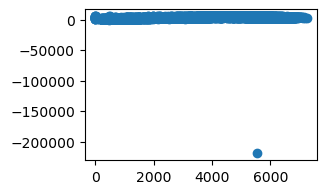

In [52]:
figure = plt.figure(figsize=(3,2),dpi = 100)
plt.scatter(y_test,y_predict)

(array([1.0575e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -5314.36176429,  17706.68655636,  40727.73487702,  63748.78319768,
         86769.83151834, 109790.87983899, 132811.92815965, 155832.97648031,
        178854.02480097, 201875.07312162, 224896.12144228]),
 <BarContainer object of 10 artists>)

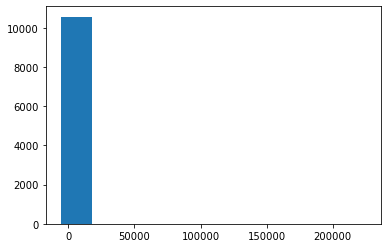

In [53]:
plt.hist(y_test - y_predict)

### conclusion
Now, the mean absolute error of Gradient descent is 879.55. We recall that the initial Mean absolute error value was 1683.55, so we can see that the linear regression model with gradient descent is improved by treating the time series periodically

# Task 4 Feature Selection
Identify subsets of the features for this prediction task. These can be the same subset for all models or model-specific subsets. 

In [54]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [55]:
# Obtain data: get FEATURE and TARGET separately
x_all_feature = x
y = metro['traffic_volume']
print("Number of feature：\n",x_all_feature.shape)
x_all_feature.head()

Number of feature：
 (32047, 13)


,month,day,hour,rain_1h,snow_1h,temp,clouds_all,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,7,1,0,0.0,0.0,289.20,1,0.000000,1.000000,0.201299,0.97953,-0.5,-0.866025
1,7,1,1,0.0,0.0,289.40,1,0.258819,0.965926,0.201299,0.97953,-0.5,-0.866025
2,7,1,2,0.0,0.0,289.19,1,0.500000,0.866025,0.201299,0.97953,-0.5,-0.866025
3,7,1,3,0.3,0.0,288.74,1,0.707107,0.707107,0.201299,0.97953,-0.5,-0.866025
4,7,1,4,0.0,0.0,288.07,1,0.866025,0.500000,0.201299,0.97953,-0.5,-0.866025


### Step 1: Preliminary selection
Variance Threshold is a class that filters features by the variance of the feature itself. For example, if a feature itself has a small variance, it means that the sample is basically not different in this feature, and probably most of the values in the feature are the same, or even the whole feature takes the same values, then this feature is not useful for sample differentiation. So whatever feature engineering is to follow, priority should be given to eliminating features with a variance of 0.

result: unfortunately, there is no feature which variance is 0, so VarianceThreshold fail to filter any feature.

In [56]:
print("before selection:",x.shape)
selector = VarianceThreshold(threshold = 0.1)
x_feature = selector.fit_transform(x)
print("after selection:",x_feature.shape)
pd.DataFrame(x_feature)

before selection: (32047, 13)
after selection: (32047, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,1.0,0.0,0.0,289.20,1.0,0.000000,1.000000,0.201299,0.97953,-0.5,-8.660254e-01
1,7.0,1.0,1.0,0.0,289.40,1.0,0.258819,0.965926,0.201299,0.97953,-0.5,-8.660254e-01
2,7.0,1.0,2.0,0.0,289.19,1.0,0.500000,0.866025,0.201299,0.97953,-0.5,-8.660254e-01
3,7.0,1.0,3.0,0.3,288.74,1.0,0.707107,0.707107,0.201299,0.97953,-0.5,-8.660254e-01
4,7.0,1.0,4.0,0.0,288.07,1.0,0.866025,0.500000,0.201299,0.97953,-0.5,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
32042,9.0,30.0,19.0,0.0,283.45,75.0,-0.965926,0.258819,-0.201299,0.97953,-1.0,-1.836970e-16
32043,9.0,30.0,20.0,0.0,282.76,90.0,-0.866025,0.500000,-0.201299,0.97953,-1.0,-1.836970e-16
32044,9.0,30.0,21.0,0.0,282.73,90.0,-0.707107,0.707107,-0.201299,0.97953,-1.0,-1.836970e-16
32045,9.0,30.0,22.0,0.0,282.09,90.0,-0.500000,0.866025,-0.201299,0.97953,-1.0,-1.836970e-16


### Step 2: Relevance filter
In this section, a f_regression model will be used.

It is important to note that the F-test is very stable when the data is normally distributed, so if we use the F-test filter, we will first convert the data to a normal distribution.

The essence of the F-test is to find a linear relationship between two sets of data, with the original hypothesis being that "there is no significant linear relationship between the data". It returns two statistics, the F-value and the p-value. As with chi-square filtering, we want to select features with p-values less than 0.05 or 0.01 that are significantly linearly related to the label, while features with p-values greater than 0.05 or 0.01 are considered to be features that are not significantly linearly related to the label and should be removed. Using the F-test classification as an example, we proceeded with feature selection on the numerical data set

In [57]:
print("before selection:",x_feature.shape)
chivalue, pvalues = f_regression(x_feature,y)
chivalue
#We want to eliminate all features with p-values greater than a set value, e.g. 0.05 or 0.01.
k_num = chivalue.shape[0] - (pvalues > 0.05).sum()
print("k = ",k_num)
dataK = SelectKBest(f_regression, k = k_num).fit_transform(x_feature, y)
score = cross_val_score(RFC(n_estimators=10,random_state=0),dataK,y,cv=5).mean()
print("before selection:",dataK.shape)
score

before selection: (32047, 12)
k =  7


/Users/zws/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


before selection: (32047, 7)


0.22130083256068578

In [58]:
x_new_feature = dataK

In [59]:
sk1 = SelectKBest(f_regression,k=7)
sk1.fit(x_feature,y)
print("score = ",sk1.scores_)
x_feature = sk1.transform(x_feature)
x_feature = pd.DataFrame(x_feature)
x_feature.head()

score =  [1.58861463e+00 3.36011425e-01 4.57839252e+03 1.16521083e+00
 5.03473406e+02 2.87256054e+02 1.93611389e+03 4.51749090e+04
 6.50981996e-03 4.44609095e+00 1.15681198e-04 4.15892871e+01]


,0,1,2,3,4,5,6
0,0.0,289.20,1.0,0.000000,1.000000,0.97953,-0.866025
1,1.0,289.40,1.0,0.258819,0.965926,0.97953,-0.866025
2,2.0,289.19,1.0,0.500000,0.866025,0.97953,-0.866025
3,3.0,288.74,1.0,0.707107,0.707107,0.97953,-0.866025
4,4.0,288.07,1.0,0.866025,0.500000,0.97953,-0.866025


Comparison with the original data shows that the features that remain are hour,temp,clouds_all,hour_sin,hour_cos,day_cos,month_cos

In [60]:
x_all_feature.head()

,month,day,hour,rain_1h,snow_1h,temp,clouds_all,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,7,1,0,0.0,0.0,289.20,1,0.000000,1.000000,0.201299,0.97953,-0.5,-0.866025
1,7,1,1,0.0,0.0,289.40,1,0.258819,0.965926,0.201299,0.97953,-0.5,-0.866025
2,7,1,2,0.0,0.0,289.19,1,0.500000,0.866025,0.201299,0.97953,-0.5,-0.866025
3,7,1,3,0.3,0.0,288.74,1,0.707107,0.707107,0.201299,0.97953,-0.5,-0.866025
4,7,1,4,0.0,0.0,288.07,1,0.866025,0.500000,0.201299,0.97953,-0.5,-0.866025


In [61]:
x_feature.columns = ['hour','temp','clouds_all','hour_sin','hour_cos','day_cos','month_cos']
x_feature.head()

,hour,temp,clouds_all,hour_sin,hour_cos,day_cos,month_cos
0,0.0,289.20,1.0,0.000000,1.000000,0.97953,-0.866025
1,1.0,289.40,1.0,0.258819,0.965926,0.97953,-0.866025
2,2.0,289.19,1.0,0.500000,0.866025,0.97953,-0.866025
3,3.0,288.74,1.0,0.707107,0.707107,0.97953,-0.866025
4,4.0,288.07,1.0,0.866025,0.500000,0.97953,-0.866025


Since the feature values have been replaced, the data set needs to be repartitioned again

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_feature,y,random_state = 22,test_size = 0.33) 

In [63]:
def linear(x_train, x_test, y_train, y_test):
    #Optimization methods for gradient descent

    # Standardisation
    transfer = StandardScaler()
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.transform(x_test)

    # estimator
    estimator = SGDRegressor(max_iter= 100)# max_iter iterations, can also be set eta0, learning_constant
    estimator.fit(x_train,y_train)

    # Gradient descent model
    print("Gradient descent - weights are：\n",estimator.coef_)
    print("Gradient descent - Bias is：\n",estimator.intercept_)
    # pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

    # Model evaluation
    y_predict = estimator.predict(x_test)
    print("Forecast traffic volumes：\n",y_predict)
    error = mean_squared_error(y_test,y_predict)# Mean squared error
    print("Gradient descent - The mean square error is：\n",error)

    print(' R squared statistic: {:.3f}'.format(estimator.score(x_test, y_test)))
    print(' All - MAE: {:.2f}'.format(mean_absolute_error(y_test,y_predict)))# Mean absolute error
    print(' RMSE:', np.sqrt(mean_squared_error(y_test, y_predict)))#Root Mean Square Error (RMSE)
    print(' All - MAPE: {:.2f}'.format(MAPE(y_test,y_predict)))
    print(' Slope: {:.2f}'.format(estimator.coef_[0]))
    print(' Intercept:', estimator.intercept_)

    return y_predict

Gradient descent - weights are：
 [  429.70843196    21.22086356   -18.75077487  -150.40790145
 -1486.44524648   -23.36996008   -62.80811055]
Gradient descent - Bias is：
 [3273.51280612]
Forecast traffic volumes：
 [ 794.7168731  4501.67582727 1453.94029422 ... 4356.75055908 5216.8932731
 2949.33700392]
Gradient descent - The mean square error is：
 1330415.3255485483
 R squared statistic: 0.658
 All - MAE: 863.66
 RMSE: 1153.4363118735894
 All - MAPE: 2.57
 Slope: 429.71
 Intercept: [3273.51280612]


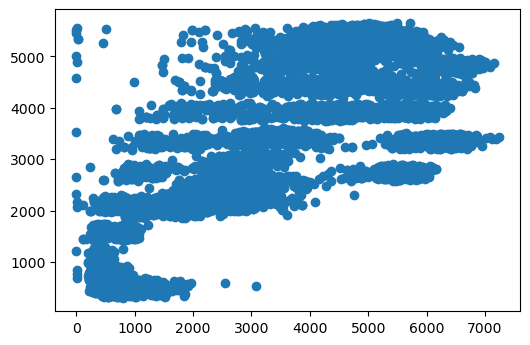

In [64]:
figure = plt.figure(dpi = 100)
y_predict = linear(x_train, x_test, y_train, y_test)
plt.scatter(y_test,y_predict)

(array([9.000e+00, 1.000e+00, 3.100e+01, 2.990e+02, 1.512e+03, 4.638e+03,
        2.464e+03, 8.050e+02, 4.850e+02, 3.320e+02]),
 array([-5541.10886814, -4605.10578129, -3669.10269444, -2733.09960758,
        -1797.09652073,  -861.09343388,    74.90965298,  1010.91273983,
         1946.91582668,  2882.91891354,  3818.92200039]),
 <BarContainer object of 10 artists>)

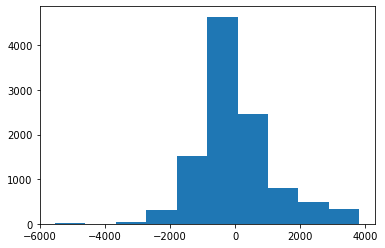

In [65]:
plt.hist(y_test - y_predict)

### conclusion
After feature selection, it is clear that the value of Mean absolute error is reduced to 863.66, which was reduced from 1683.55 at the beginning, to 879.55 after the time periodicity process, and then reduced again to 863.66 by feature selection. it can be seen that the prediction accuracy of the model is improved again by feature selection.